# MVP

## Airline Passenger Satisfaction


The purpose of this project is to create a classification model from a data survey obtained from Kaggle website about passengers flight satisfaction to find the key factors that influence customers satisfaction.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, log_loss,classification_report
%matplotlib inline

from ipywidgets import interactive

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")


In [2]:
#reading data
df = pd.read_csv('Airline.csv')

In [34]:
df 


Satisfaction  Gender       Customer Type  Age   Type Of Travel  \
0                 0    Male  Returning Customer   13  Personal Travel   
1                 0    Male        New Customer   25  Business travel   
2                 0  Female  Returning Customer   25  Business travel   
3                 1    Male  Returning Customer   61  Business travel   
4                 0  Female  Returning Customer   26  Personal Travel   
...             ...     ...                 ...  ...              ...   
69075             0  Female        New Customer   36  Business travel   
69076             0    Male        New Customer   34  Business travel   
69077             0  Female  Returning Customer   17  Personal Travel   
69078             1    Male  Returning Customer   14  Business travel   
69079             0  Female  Returning Customer   42  Personal Travel   

          Class  Flight Distance  Inflight Wifi Service  \
0       Economy              460                      3   
1      Business              235                      3   
2      Business              562                      2   
3      Business              214                      3   
4       Economy             1180                      3   
...         ...              ...                    ...   
69075   Economy              432                      1   
69076  Business              526                      3   
69077   Economy              828                      2   
69078  Business             1127                      3   
69079   Economy              264                      2   

       Departure/Arrival Time Convenience  Ease Of Online Booking  \
0                                       4                       3   
1                                       2                       3   
2                                       5                       5   
3                                       3                       3   
4                                       4                       2   
...                                   ...                     ...   
69075                                   5                       1   
69076                                   3                       3   
69077                                   5                       1   
69078                                   3                       3   
69079                                   5                       2   

       Gate Location  Food And Drink  Online Boarding  Seat Comfort  \
0                  1               5                3             5   
1                  3               1                3             1   
2                  5               2                2             2   
3                  3               4                5             5   
4                  1               1                2             1   
...              ...             ...              ...           ...   
69075              3               4                1             4   
69076              1               4                3             4   
69077              5               2                1             2   
69078              3               4                4             4   
69079              5               4                2             2   

       Inflight Entertainment  On-board Service  Leg Room  Baggage Handling  \
0                           5                 4         3                 4   
1                           1                 1         5                 3   
2                           2                 2         5                 3   
3                           3                 3         4                 4   
4                           1                 3         4                 4   
...                       ...               ...       ...               ...   
69075                       4                 5         2                 5   
69076                       4                 3         2                 4   
69077                       

## Exploring the Dataset

In [3]:
#shape of the dataset
df.shape

(129880, 24)

In [4]:
#check the columns
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Satisfaction'],
      dtype='object')

In [5]:
#check datatypes of all  columns.
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [6]:
#check for duplication
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
129875    False
129876    False
129877    False
129878    False
129879    False
Length: 129880, dtype: bool


In [7]:
#check for missing values
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Satisfaction                           0
dtype: int64

In [8]:
# check for unique values of all columns
df.nunique()

id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              466
Arrival Delay in Minutes        

In [9]:
#check for null values 
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Satisfaction                           0
dtype: int64

## Data Cleaning

In [10]:
#drop null values
df = df.dropna(axis=0)

In [11]:
#check for null values 
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Satisfaction                         0
dtype: int64

In [12]:
#change data type
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('float')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69080 entries, 0 to 69079
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Satisfaction                        69080 non-null  int64  
 1   Gender                              69080 non-null  object 
 2   Customer Type                       69080 non-null  object 
 3   Age                                 69080 non-null  int64  
 4   Type Of Travel                      69080 non-null  object 
 5   Class                               69080 non-null  object 
 6   Flight Distance                     69080 non-null  int64  
 7   Inflight Wifi Service               69080 non-null  int64  
 8   Departure/Arrival Time Convenience  69080 non-null  int64  
 9   Ease Of Online Booking              69080 non-null  int64  
 10  Gate Location                       69080 non-null  int64  
 11  Food And Drink                      69080

In [13]:
#rename a columns
df = df.rename(columns={'Leg room service':'Leg room'})

In [14]:
from string import capwords
df.columns = [capwords(i) for i in df.columns]
df = df.rename(columns={'Departure/arrival Time Convenient':'Departure/Arrival Time Convenience'})

In [36]:
df.head()

Satisfaction  Gender       Customer Type  Age   Type Of Travel     Class  \
0             0    Male  Returning Customer   13  Personal Travel   Economy   
1             0    Male        New Customer   25  Business travel  Business   
2             0  Female  Returning Customer   25  Business travel  Business   
3             1    Male  Returning Customer   61  Business travel  Business   
4             0  Female  Returning Customer   26  Personal Travel   Economy   

   Flight Distance  Inflight Wifi Service  Departure/Arrival Time Convenience  \
0              460                      3                                   4   
1              235                      3                                   2   
2              562                      2                                   5   
3              214                      3                                   3   
4             1180                      3                                   4   

   Ease Of Online Booking  Gate Location  Food And Drink  Online Boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       5              5               2                2   
3                       3              3               4                5   
4                       2              1               1                2   

   Seat Comfort  Inflight Entertainment  On-board Service  Leg Room  \
0             5                       5                 4         3   
1             1                       1                 1         5   
2             2                       2                 2         5   
3             5                       3                 3         4   
4             1                       1                 3         4   

   Baggage Handling  Checkin Service  Inflight Service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 3                1                 4            2   
3                 4                3                 3            3   
4                 4                4                 4            1   

   Total Delay  
0         43.0  
1          7.0  
2         20.0  
3          0.0  
4          0.0

In [15]:
#remove 0 value from the following columns
df = df[(df['Inflight Wifi Service']!=0)&(df['Departure/Arrival Time Convenience']!=0)&(df['Ease Of Online Booking']!=0)&(df['Gate Location'])&(df['Food And Drink']!=0)]


In [16]:
#use dictionary for loyal customer & disloyal customer
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':'Returning Customer','disloyal Customer':'New Customer'})

In [37]:
df

Satisfaction  Gender       Customer Type  Age   Type Of Travel  \
0                 0    Male  Returning Customer   13  Personal Travel   
1                 0    Male        New Customer   25  Business travel   
2                 0  Female  Returning Customer   25  Business travel   
3                 1    Male  Returning Customer   61  Business travel   
4                 0  Female  Returning Customer   26  Personal Travel   
...             ...     ...                 ...  ...              ...   
69075             0  Female        New Customer   36  Business travel   
69076             0    Male        New Customer   34  Business travel   
69077             0  Female  Returning Customer   17  Personal Travel   
69078             1    Male  Returning Customer   14  Business travel   
69079             0  Female  Returning Customer   42  Personal Travel   

          Class  Flight Distance  Inflight Wifi Service  \
0       Economy              460                      3   
1      Business              235                      3   
2      Business              562                      2   
3      Business              214                      3   
4       Economy             1180                      3   
...         ...              ...                    ...   
69075   Economy              432                      1   
69076  Business              526                      3   
69077   Economy              828                      2   
69078  Business             1127                      3   
69079   Economy              264                      2   

       Departure/Arrival Time Convenience  Ease Of Online Booking  \
0                                       4                       3   
1                                       2                       3   
2                                       5                       5   
3                                       3                       3   
4                                       4                       2   
...                                   ...                     ...   
69075                                   5                       1   
69076                                   3                       3   
69077                                   5                       1   
69078                                   3                       3   
69079                                   5                       2   

       Gate Location  Food And Drink  Online Boarding  Seat Comfort  \
0                  1               5                3             5   
1                  3               1                3             1   
2                  5               2                2             2   
3                  3               4                5             5   
4                  1               1                2             1   
...              ...             ...              ...           ...   
69075              3               4                1             4   
69076              1               4                3             4   
69077              5               2                1             2   
69078              3               4                4             4   
69079              5               4                2             2   

       Inflight Entertainment  On-board Service  Leg Room  Baggage Handling  \
0                           5                 4         3                 4   
1                           1                 1         5                 3   
2                           2                 2         5                 3   
3                           3                 3         4                 4   
4                           1                 3         4                 4   
...                       ...               ...       ...               ...   
69075                       4                 5         2                 5   
69076                       4                 3         2                 4   
69077                       

In [17]:
#use dictionary to change satisfied & dissatisfied to 1 & 0 
#sum departure & arrival delay
df['Satisfaction'] = df['Satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
df = df.reset_index()
df = df.drop('index',axis=1)
df['Total Delay'] = df['Departure Delay In Minutes'] + df['Arrival Delay In Minutes']

In [18]:
#copy & drop
DF = df.copy()
df = df.drop('Id',axis=1)

In [21]:
#loss two points from satisfaction 
#drop two unwanted columns 
df = df.reindex(columns=['Satisfaction']+list(df.columns)[:-2]+['Total Delay'])
df = df.drop(['Departure Delay In Minutes','Arrival Delay In Minutes'],axis=1)

In [23]:
#returns the relative frequency by dividing all values by the sum of values
df['Satisfaction'].value_counts(normalize=True)

0    0.56423
1    0.43577
Name: Satisfaction, dtype: float64

In [25]:
##use dictionary to change names
df['Class'] = df['Class'].map({'Eco':'Economy','Eco Plus':'Economy','Business':'Business'})

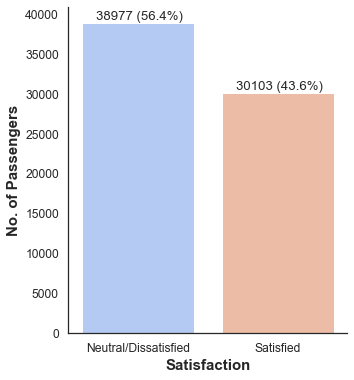

In [26]:
#visualizations
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',palette='coolwarm')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot1.png',transparent=True, bbox_inches='tight')

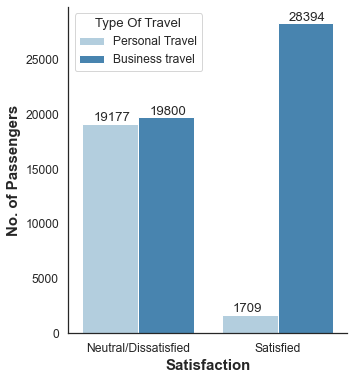

In [27]:
#visualizations
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',hue='Type Of Travel',palette='Blues')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot2.png',transparent=True, bbox_inches='tight')

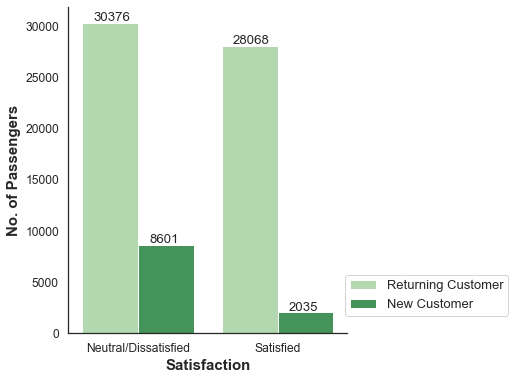

In [28]:
##visualizations
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',hue='Customer Type',palette='Greens')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 0.2),fontsize=13)
sns.despine()
plt.savefig('targetplot3.png',transparent=True, bbox_inches='tight')

In [29]:
df['Inflight Wifi Service'].value_counts()

3    20681
1    14925
2    13422
5    10985
4     9067
Name: Inflight Wifi Service, dtype: int64

In [38]:
df

Satisfaction  Gender       Customer Type  Age   Type Of Travel  \
0                 0    Male  Returning Customer   13  Personal Travel   
1                 0    Male        New Customer   25  Business travel   
2                 0  Female  Returning Customer   25  Business travel   
3                 1    Male  Returning Customer   61  Business travel   
4                 0  Female  Returning Customer   26  Personal Travel   
...             ...     ...                 ...  ...              ...   
69075             0  Female        New Customer   36  Business travel   
69076             0    Male        New Customer   34  Business travel   
69077             0  Female  Returning Customer   17  Personal Travel   
69078             1    Male  Returning Customer   14  Business travel   
69079             0  Female  Returning Customer   42  Personal Travel   

          Class  Flight Distance  Inflight Wifi Service  \
0       Economy              460                      3   
1      Business              235                      3   
2      Business              562                      2   
3      Business              214                      3   
4       Economy             1180                      3   
...         ...              ...                    ...   
69075   Economy              432                      1   
69076  Business              526                      3   
69077   Economy              828                      2   
69078  Business             1127                      3   
69079   Economy              264                      2   

       Departure/Arrival Time Convenience  Ease Of Online Booking  \
0                                       4                       3   
1                                       2                       3   
2                                       5                       5   
3                                       3                       3   
4                                       4                       2   
...                                   ...                     ...   
69075                                   5                       1   
69076                                   3                       3   
69077                                   5                       1   
69078                                   3                       3   
69079                                   5                       2   

       Gate Location  Food And Drink  Online Boarding  Seat Comfort  \
0                  1               5                3             5   
1                  3               1                3             1   
2                  5               2                2             2   
3                  3               4                5             5   
4                  1               1                2             1   
...              ...             ...              ...           ...   
69075              3               4                1             4   
69076              1               4                3             4   
69077              5               2                1             2   
69078              3               4                4             4   
69079              5               4                2             2   

       Inflight Entertainment  On-board Service  Leg Room  Baggage Handling  \
0                           5                 4         3                 4   
1                           1                 1         5                 3   
2                           2                 2         5                 3   
3                           3                 3         4                 4   
4                           1                 3         4                 4   
...                       ...               ...       ...               ...   
69075                       4                 5         2                 5   
69076                       4                 3         2                 4   
69077                       

In [30]:
df1 = pd.get_dummies(df,columns=['Gender','Customer Type','Type Of Travel','Class'],drop_first=True)
df1

Satisfaction  Age  Flight Distance  Inflight Wifi Service  \
0                 0   13              460                      3   
1                 0   25              235                      3   
2                 0   25              562                      2   
3                 1   61              214                      3   
4                 0   26             1180                      3   
...             ...  ...              ...                    ...   
69075             0   36              432                      1   
69076             0   34              526                      3   
69077             0   17              828                      2   
69078             1   14             1127                      3   
69079             0   42              264                      2   

       Departure/Arrival Time Convenience  Ease Of Online Booking  \
0                                       4                       3   
1                                       2                       3   
2                                       5                       5   
3                                       3                       3   
4                                       4                       2   
...                                   ...                     ...   
69075                                   5                       1   
69076                                   3                       3   
69077                                   5                       1   
69078                                   3                       3   
69079                                   5                       2   

       Gate Location  Food And Drink  Online Boarding  Seat Comfort  \
0                  1               5                3             5   
1                  3               1                3             1   
2                  5               2                2             2   
3                  3               4                5             5   
4                  1               1                2             1   
...              ...             ...              ...           ...   
69075              3               4                1             4   
69076              1               4                3             4   
69077              5               2                1             2   
69078              3               4                4             4   
69079              5               4                2             2   

       Inflight Entertainment  On-board Service  Leg Room  Baggage Handling  \
0                           5                 4         3                 4   
1                           1                 1         5                 3   
2                           2                 2         5                 3   
3                           3                 3         4                 4   
4                           1                 3         4                 4   
...                       ...               ...       ...               ...   
69075                       4                 5         2                 5   
69076                       4                 3         2                 4   
69077                       2                 4         3                 4   
69078                       4                 3         2                 5   
69079                       1                 1         2                 1   

       Checkin Service  Inflight Service  Cleanliness  Total Delay  \
0                    4                 5            5         43.0   
1                    1                 4            1          7.0   
2                    1                 4            2         20.0   
3                    3                 3            3          0.0   
4                    4                 4            1          0.0   
...                ...               ...          ...          ...   
69075                2                 3            4          0.0   

In [40]:
df1

Satisfaction  Age  Flight Distance  Inflight Wifi Service  \
0                 0   13              460                      3   
1                 0   25              235                      3   
2                 0   25              562                      2   
3                 1   61              214                      3   
4                 0   26             1180                      3   
...             ...  ...              ...                    ...   
69075             0   36              432                      1   
69076             0   34              526                      3   
69077             0   17              828                      2   
69078             1   14             1127                      3   
69079             0   42              264                      2   

       Departure/Arrival Time Convenience  Ease Of Online Booking  \
0                                       4                       3   
1                                       2                       3   
2                                       5                       5   
3                                       3                       3   
4                                       4                       2   
...                                   ...                     ...   
69075                                   5                       1   
69076                                   3                       3   
69077                                   5                       1   
69078                                   3                       3   
69079                                   5                       2   

       Gate Location  Food And Drink  Online Boarding  Seat Comfort  \
0                  1               5                3             5   
1                  3               1                3             1   
2                  5               2                2             2   
3                  3               4                5             5   
4                  1               1                2             1   
...              ...             ...              ...           ...   
69075              3               4                1             4   
69076              1               4                3             4   
69077              5               2                1             2   
69078              3               4                4             4   
69079              5               4                2             2   

       Inflight Entertainment  On-board Service  Leg Room  Baggage Handling  \
0                           5                 4         3                 4   
1                           1                 1         5                 3   
2                           2                 2         5                 3   
3                           3                 3         4                 4   
4                           1                 3         4                 4   
...                       ...               ...       ...               ...   
69075                       4                 5         2                 5   
69076                       4                 3         2                 4   
69077                       2                 4         3                 4   
69078                       4                 3         2                 5   
69079                       1                 1         2                 1   

       Checkin Service  Inflight Service  Cleanliness  Total Delay  \
0                    4                 5            5         43.0   
1                    1                 4            1          7.0   
2                    1                 4            2         20.0   
3                    3                 3            3          0.0   
4                    4                 4            1          0.0   
...                ...               ...          ...          ...   
69075                2                 3            4          0.0   

In [31]:
group = df1.groupby(['Satisfaction','Class_Economy'])['Class_Economy'].count()
group

Satisfaction  Class_Economy
0             0                10716
              1                28261
1             0                23597
              1                 6506
Name: Class_Economy, dtype: int64

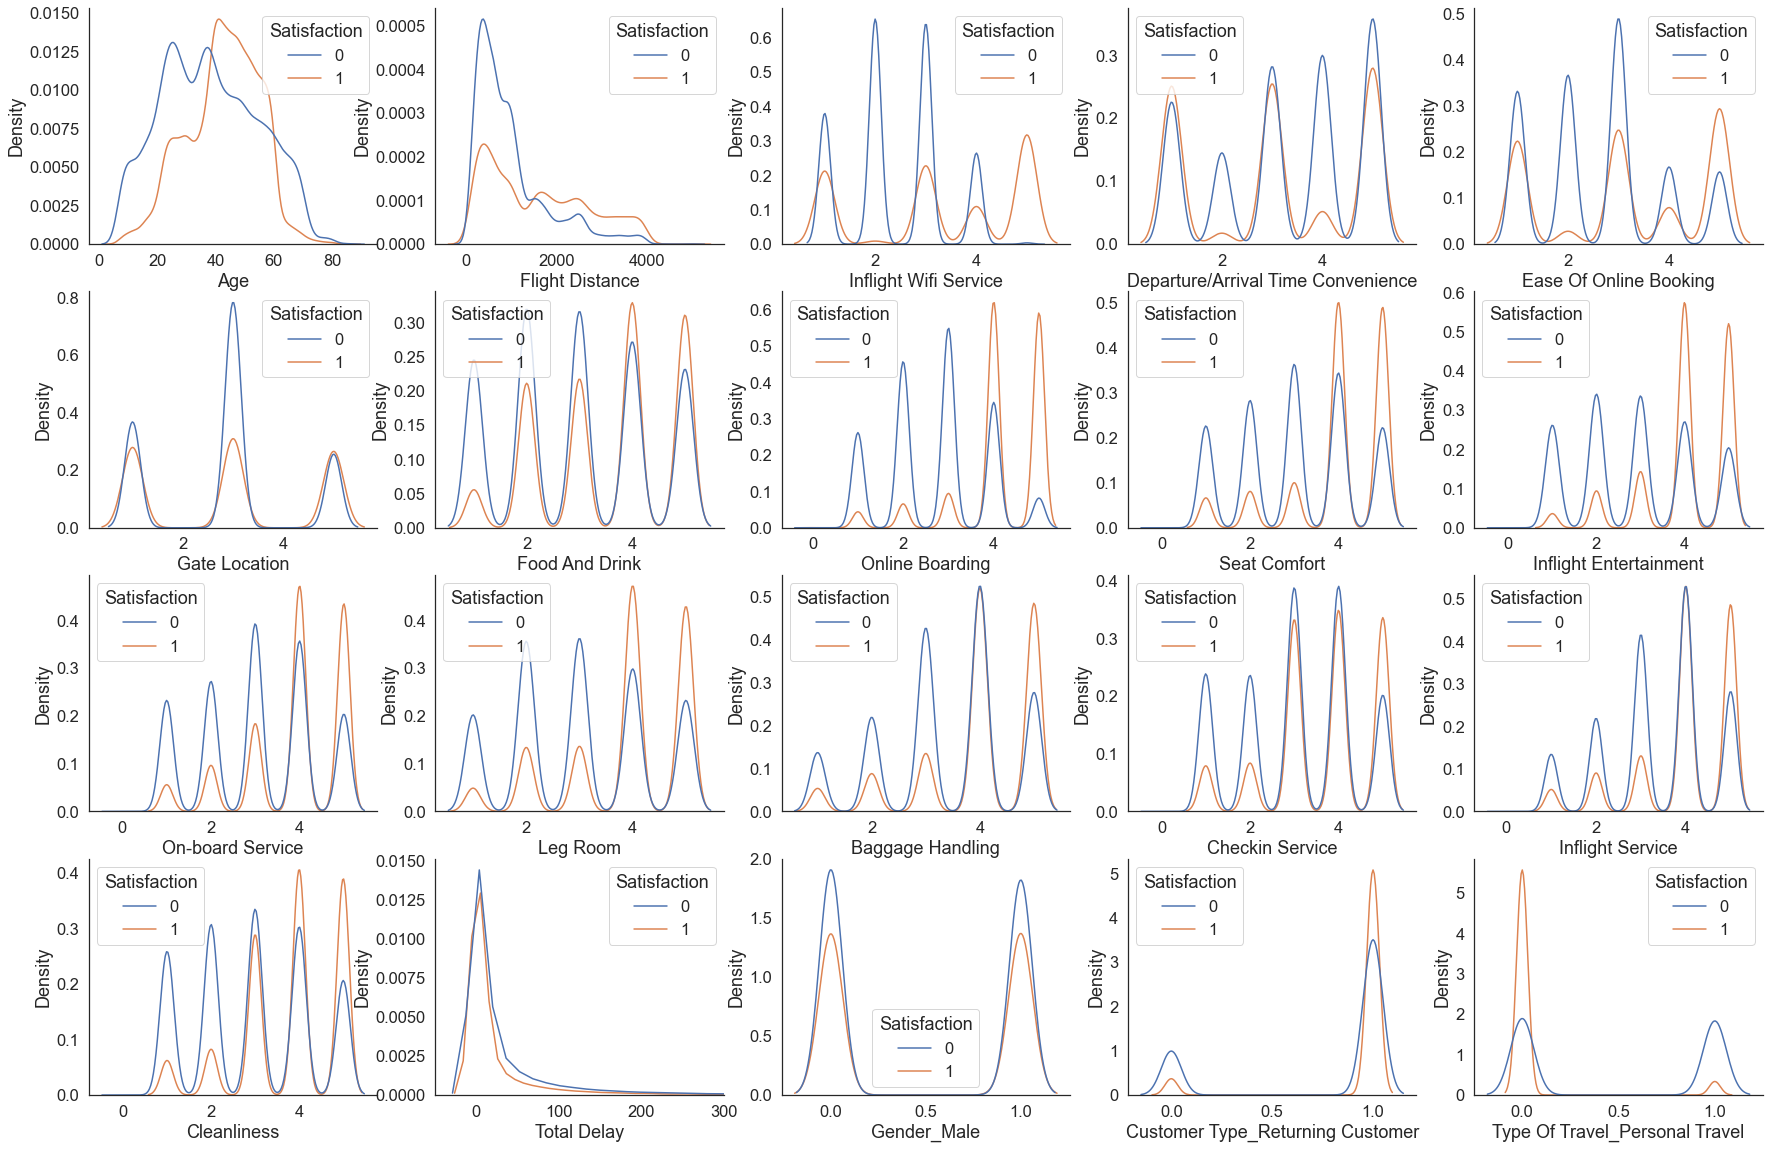

In [32]:
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[30,20])
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    sns.kdeplot(data=df1,x=df1.columns[i+1],hue='Satisfaction')
    if i == 16:
        plt.xlim([-50,300])
    sns.despine()
    plt.savefig('kdeplot.png',transparent=True, bbox_inches='tight')

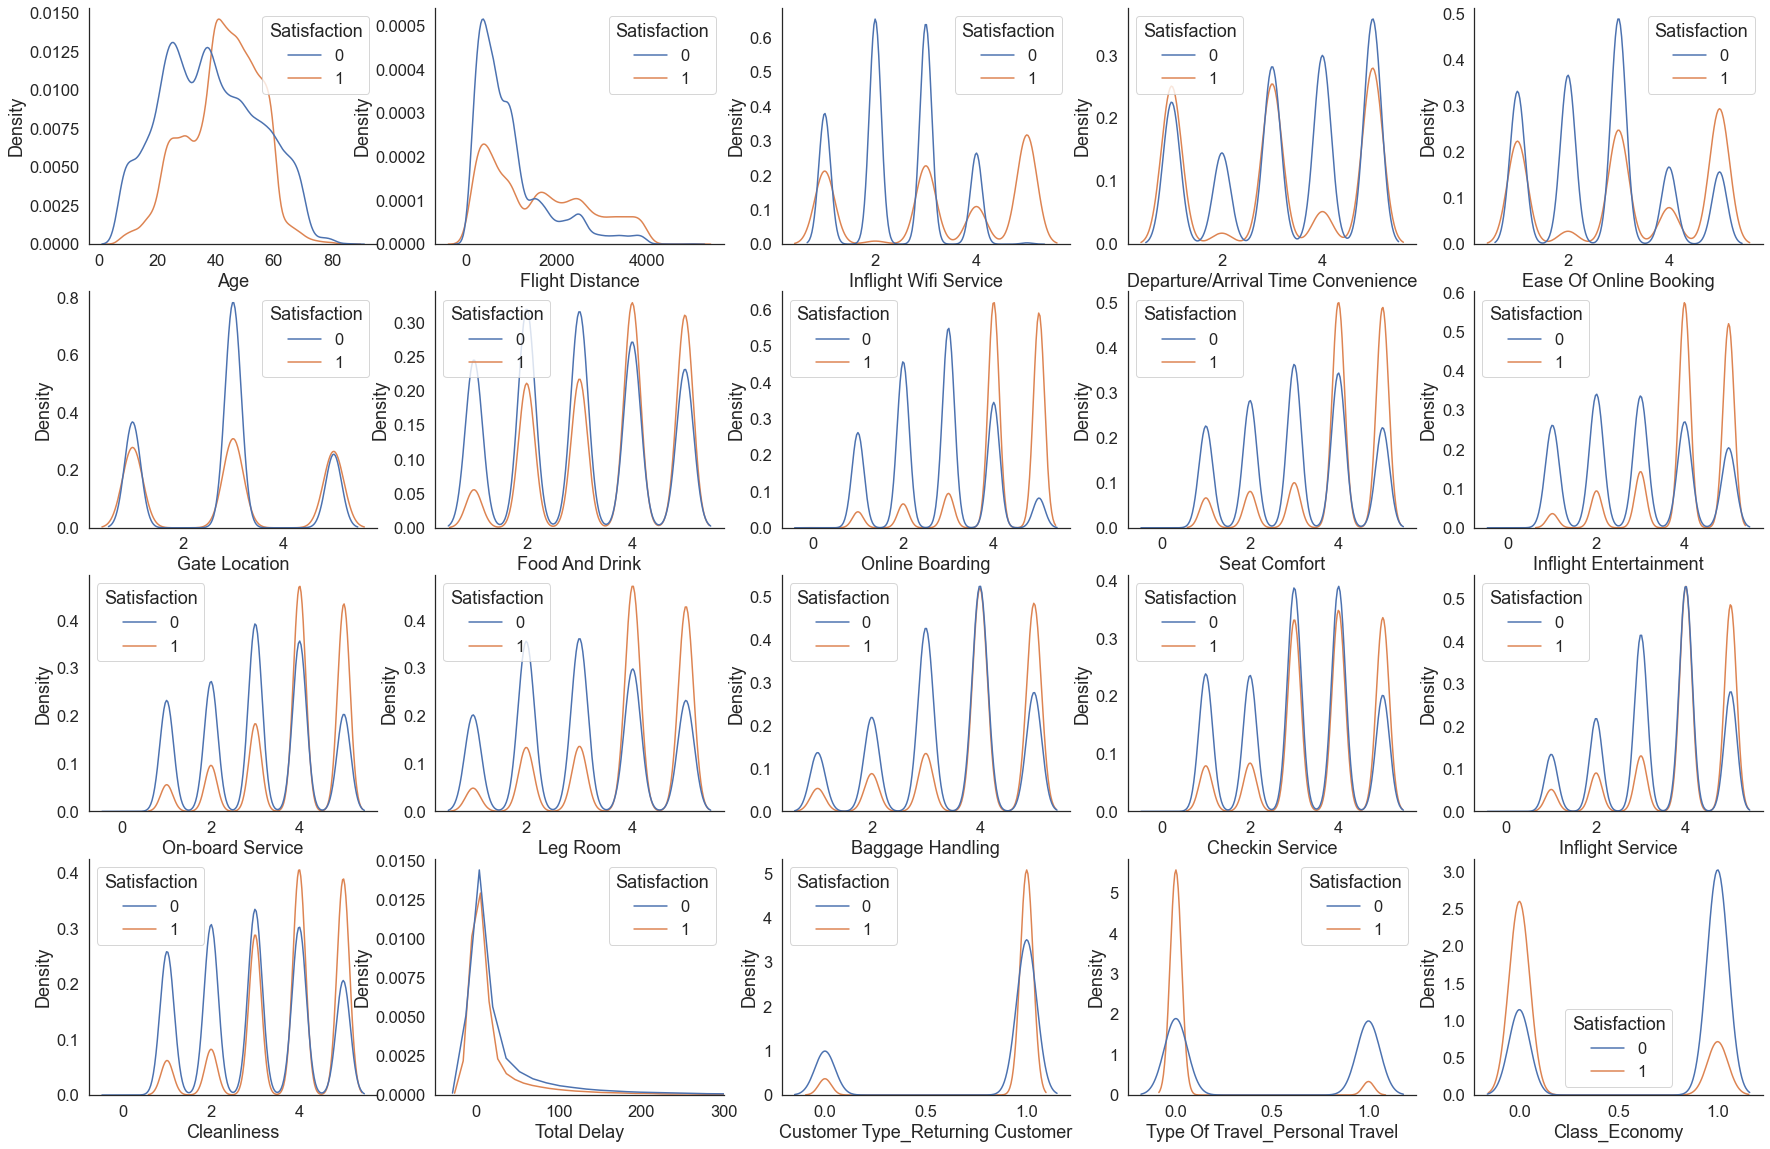

In [33]:
df1 = df1.drop('Gender_Male',axis=1)
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[30,20])
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    sns.kdeplot(data=df1,x=df1.columns[i+1],hue='Satisfaction')
    if i == 16:
        plt.xlim([-50,300])
    sns.despine()

In [45]:
corr_matrix = df1.corr()
corr_matrix

Satisfaction       Age  Flight Distance  \
Satisfaction                            1.000000  0.150148         0.303573   
Age                                     0.150148  1.000000         0.083561   
Flight Distance                         0.303573  0.083561         1.000000   
Inflight Wifi Service                   0.348685  0.015514         0.005434   
Departure/Arrival Time Convenience     -0.070199 -0.018912        -0.076457   
Ease Of Online Booking                  0.204180  0.017283         0.050278   
Gate Location                           0.043514  0.016345         0.031355   
Food And Drink                          0.229749  0.022548         0.057610   
Online Boarding                         0.565900  0.190513         0.195364   
Seat Comfort                            0.372702  0.159465         0.154660   
Inflight Entertainment                  0.444813  0.081081         0.131971   
On-board Service                        0.345825  0.064431         0.115098   
Leg Room                                0.344374  0.053159         0.134020   
Baggage Handling                        0.270941 -0.040770         0.069305   
Checkin Service                         0.237069  0.037789         0.074051   
Inflight Service                        0.268116 -0.046621         0.061727   
Cleanliness                             0.331150  0.055301         0.095925   
Total Delay                            -0.055821 -0.015938        -0.001070   
Customer Type_Returning Customer        0.210297  0.249138         0.199238   
Type Of Travel_Personal Travel         -0.469905 -0.065662        -0.280219   
Class_Economy                          -0.504738 -0.137615        -0.468558   

                                    Inflight Wifi Service  \
Satisfaction                                     0.348685   
Age                                              0.015514   
Flight Distance                                  0.005434   
Inflight Wifi Service                            1.000000   
Departure/Arrival Time Convenience               0.441407   
Ease Of Online Booking                           0.672502   
Gate Location                                    0.443750   
Food And Drink                                   0.141427   
Online Boarding                                  0.419654   
Seat Comfort                                     0.135241   
Inflight Entertainment                           0.216103   
On-board Service                                 0.119020   
Leg Room                                         0.150972   
Baggage Handling                                 0.112065   
Checkin Service                                  0.051611   
Inflight Service                                 0.102477   
Cleanliness                                      0.144802   
Total Delay                                     -0.025492   
Customer Type_Returning Customer                 0.011744   
Type Of Travel_Personal Travel                  -0.119077   
Class_Economy                                   -0.039472   

                                    Departure/Arrival Time Convenience  \
Satisfaction                                                 -0.070199   
Age                                                          -0.018912   
Flight Distance                                              -0.076457   
Inflight Wifi Service                                         0.441407   
Departure/Arrival Time Convenience                            1.000000   
Ease Of Online Booking                                        0.576568   
Gate Location                                                 0.596703   
Food And Drink                                               -0.010847   
Online Boarding                                               0.043146   
Seat Comfort                                                 -0.020117   
Inflight Entertainment                                       -0.036832   
On-board Service                                              0.06

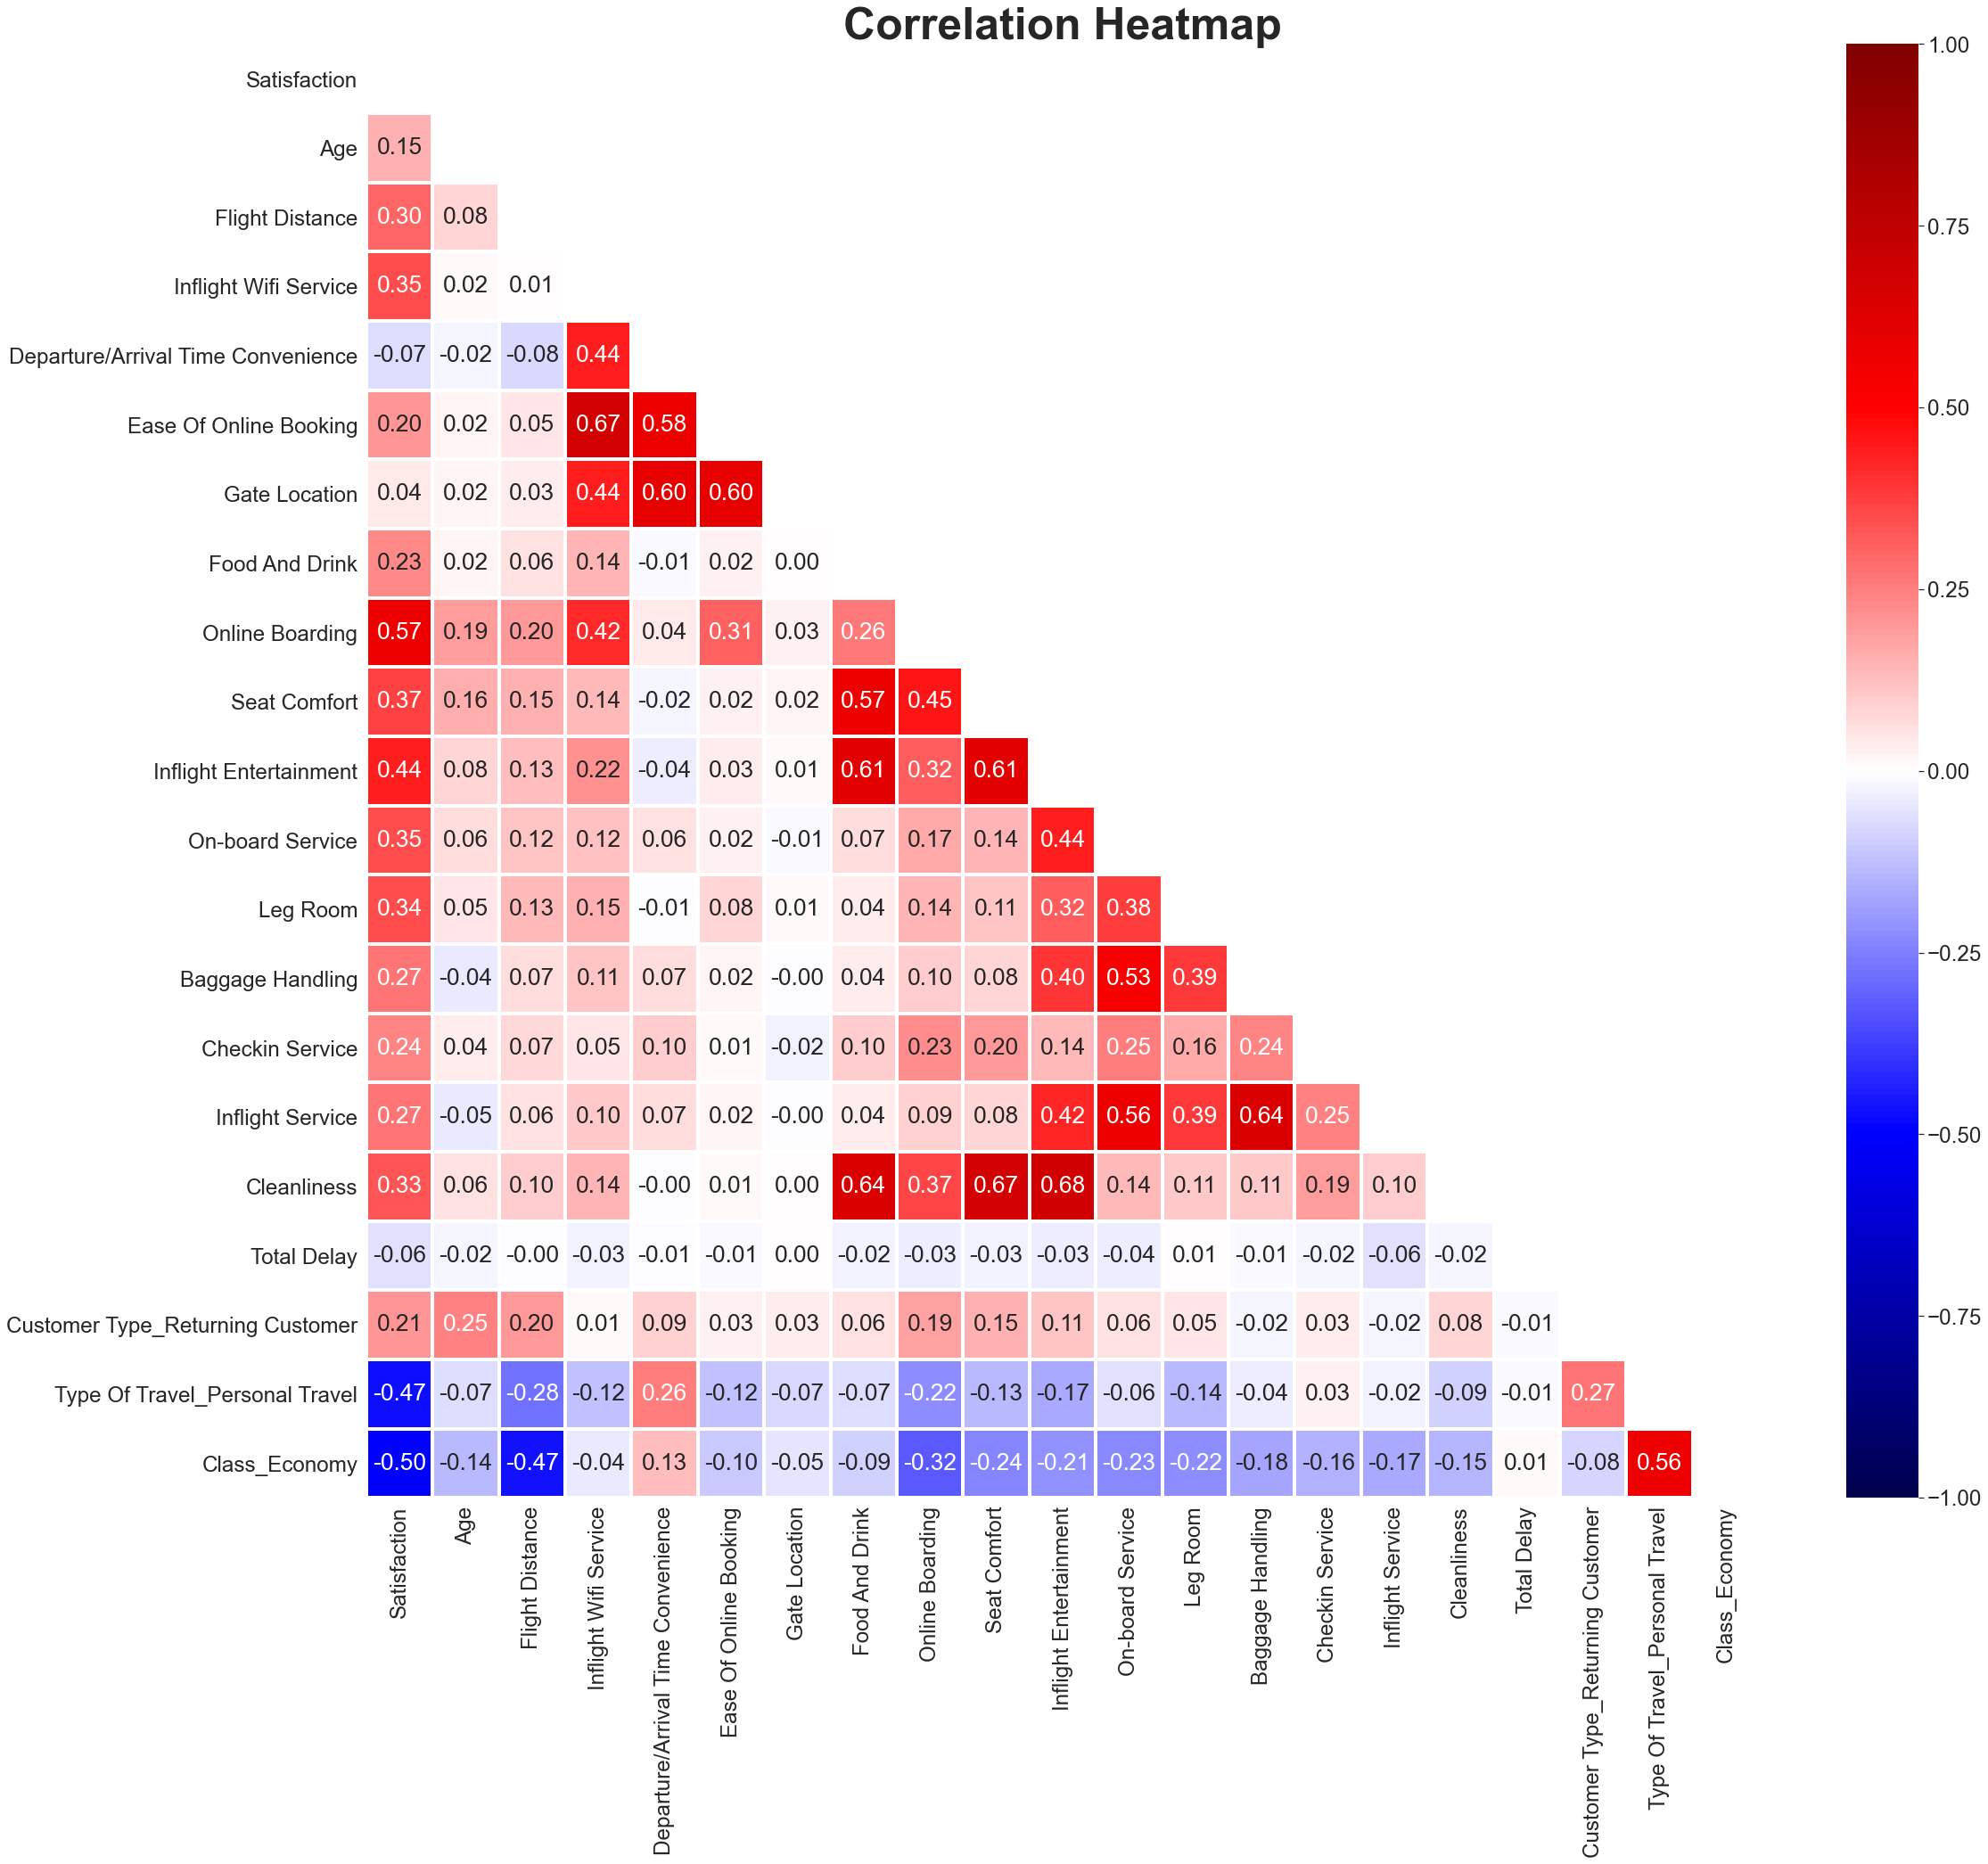

In [46]:
sns.set(style='white',font_scale=2.2)
fig = plt.figure(figsize=[35,30])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(150, 0, as_cmap=True)
sns.heatmap(corr_matrix,cmap='seismic',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=50)
plt.savefig('heatmap.png',transparent=True, bbox_inches='tight')

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69080 entries, 0 to 69079
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Satisfaction                        69080 non-null  int64  
 1   Age                                 69080 non-null  int64  
 2   Flight Distance                     69080 non-null  int64  
 3   Inflight Wifi Service               69080 non-null  int64  
 4   Departure/Arrival Time Convenience  69080 non-null  int64  
 5   Ease Of Online Booking              69080 non-null  int64  
 6   Gate Location                       69080 non-null  int64  
 7   Food And Drink                      69080 non-null  int64  
 8   Online Boarding                     69080 non-null  int64  
 9   Seat Comfort                        69080 non-null  int64  
 10  Inflight Entertainment              69080 non-null  int64  
 11  On-board Service                    69080

In [48]:
y = df1['Satisfaction']
X = df1.drop('Satisfaction',axis=1)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
Cvec = np.linspace(0.001,2,100)
logit_model = LogisticRegressionCV(Cs = Cvec, cv=kf,max_iter=10000)
logit_model.fit(X_train_val, y_train_val)
logit_model.C_

array([0.14234343])

In [49]:
logit_model = LogisticRegression(C=logit_model.C_[0],max_iter=10000)
Mean_AUC_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_Logit_CV 

0.9615598639969452

In [53]:
Mean_Precision_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_Logit_CV 

0.8839473466530631

In [54]:
Mean_Recall_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_Logit_CV 

0.8800999201969324